In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

### Загрузим датасет с машинами. Цель - верно восстанавливать для каждой из них цену продажи!

In [19]:
data = pd.read_csv('autos.csv')

data.head()

name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner

In [20]:
### Колонка с тергетом - "selling price"

X = data.drop("selling_price", axis=1)
y = data["selling_price"]

### Будем замерять MSLE!
### Поэтому прологарифмируем таргет
### А после оптимизируем MSE

y = y.apply(np.log1p)

In [21]:
### Разделим выборку на трейн и тест!

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

__Задание__ 

Реализуйте свой MeanTargetEncoder с добавленем некоторого шума!

Однажды в лекционном материале, обсуждая счетчики, мы говорили с вами о том, что из-за них модели могут переобучаться. Один из способов бороться с этим - валидировать расчеты среднего таргета (стратегия отложенной выборки / расчеты на кросс-валидации). Но есть еще проще!

Можно просто к значению счетчика добавить случайный шум (зашумить данные)!

Напомним, что рассчитываться новые признаки должны по такой формуле:

$$
g_j = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}{l} + C * \epsilon
$$



Пусть шум будет случайной величиной из нормального стандартного распределения, то есть $\epsilon \sim N(0, 1) $, а $ C = 0.006$.

Создавая свой класс-трансформер, наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`. Трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать только по обучающей выборке в методе `fit`. Ваш трансформер должен принимать при инициализации список из категориальных признаков и список из числовых признаков. 

Если для какого-то признака в тестовой выборке отсутствует значение, трансформер должен поставить там 0.

На выходе должен получиться датасет того же размера с измененными категориальными признаками.

Класс MeanTargetEncoderNoise должен иметь следующую сигнатуру:



In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class MeanTargetEncoderNoise(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical, numeric):              
        ### Your code is here
    
    def fit(self, X, y):
        ### Your code is here

        return self
        
    def transform(self, df):
        ### Your code is here
        
        return temp

Разделите колонки на вещественные и категориальные. Приведите все категориальные колонки к типу `object`.

Далее применим наш кодировщик к `X_train, X_test`, так же как например мы применяем `StandardScaler`, чтобы проверить работоспособность нашего класса. Установите зерно датчика случайный чисел `np.random.seed(1)`.

После того, как вы изменили обучающую и тестовую выборки, сохраните первые 10 строк полученного промежуточного датафрейма обучающей выборки (`X_train`) в файл в формате csv с сепаратором `;`. Не забудьте индекс. Отправьте полученный файл в форму ниже.

Список колонок которые должны быть в файле для сдачи:
```py
cols = [
    "km_driven",
    "name",
    "year",
    "fuel",
    "seller_type",
    "transmission",
    "owner"
]
```

### Ваше решение


Разделение колонок на категориальные и числовые.

In [22]:
object_cols = ['name', 'year', 'fuel', 'seller_type', 'transmission', 'owner']
num_cols = ['km_driven']

X.head()
X[object_cols] = X[object_cols].astype(object)
X_train[object_cols] = X_train[object_cols].astype(object)
X_test[object_cols] = X_test[object_cols].astype(object)

In [23]:
pd.concat((X,y), axis = 1).groupby('year')['selling_price'].mean()

year
1992    10.819798
1995    11.461643
1996    12.317649
1997    11.338470
1998    11.392866
1999    11.129003
2000    11.177787
2001    11.363014
2002    11.342487
2003    11.268382
2004    11.556526
2005    11.483543
2006    11.727260
2007    11.812244
2008    11.911333
2009    12.156795
2010    12.264658
2011    12.411815
2012    12.619788
2013    12.858769
2014    12.947612
2015    13.039875
2016    13.134919
2017    13.343400
2018    13.467398
2019    13.559709
2020    13.436909
Name: selling_price, dtype: float64

In [56]:
np.random.seed(1)

### Функция считает среднее и добавляет шум из стандартного нормального распределения

def func1(x):
    return np.sum(x) / x.size + 0.006 * np.random.normal(loc = 0.0, scale = 1.0, size =1)[0]

Реализация класса MeanTargetEncoderNoise.

In [140]:
from sklearn.base import BaseEstimator, TransformerMixin
import itertools

### Реализуем класс, считающий средние значения по таргету
### И немного зашумляющий их
### Данная реализация не претендует на звание самой лучшей!
### Любые другие, работающие за адекватное время, тоже подойдут
### Советуем потыкать и разобраться, если самостоятельно во время 
### Выполнения ДЗ не получилось!

class MeanTargetEncoderNoise(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical, numeric):
        self.categorical = categorical
        self.numeric = numeric
    
    def fit(self, X, y):

        X['y'] = y
        
        arr = []
        
        for i in self.categorical:
            
            temp = X.groupby(i).agg({'y':[func1]}).reset_index()
            arr.append((list(temp[i]), list(temp['y']['func1'])))
            
        
        self.arr = arr

        return self
        
    def transform(self, df):
        
        arr = self.arr
        
        temp = pd.DataFrame()
        
        c = 0
        
        for i in self.categorical:
            
            setik = set(df[i].unique())
            setik.difference_update(set(arr[c][0]))

            column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
            column = column.replace(list(setik), 0).reset_index()[i]

            temp = pd.concat([temp, column], axis=1)
            
            c+=1        

        temp = pd.concat([df[self.numeric].reset_index(drop=True), temp], axis=1)
        
        return temp

Проверка работы трансформера.

In [102]:
np.random.seed(1)
transformer = MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)

transformer.fit(X_train, y_train)

train = transformer.transform(X_train)
test = transformer.transform(X_test)

train.head(10)

C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\1660144821.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\1660144821.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\1660144821.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

km_driven       name       year       fuel  seller_type  transmission  \
0      50000  13.483692  13.436559  13.093756    12.615863     13.771135   
1      70000  12.117029  11.903115  12.453832    12.615863     13.771135   
2      50000  12.310456  13.328864  12.453832    12.615863     12.639805   
3      92198  12.491443  13.042359  12.453832    13.152824     12.639805   
4       3240  12.390906  12.870886  12.453832    12.615863     12.639805   
5      10000  12.687432  13.436559  12.453832    13.152824     12.639805   
6      90000  11.698702  11.503504  12.453832    12.615863     12.639805   
7      79000  11.120678  11.503504  12.453832    12.615863     12.639805   
8      99700  13.172879  13.328864  13.093756    12.615863     12.639805   
9     124000  13.004194  12.241213  13.093756    12.615863     12.639805   

       owner  
0  12.977730  
1  12.977730  
2  12.977730  
3  12.463313  
4  12.463313  
5  12.977730  
6  11.878390  
7  12.463313  
8  12.977730  
9  12.463313

In [103]:
train.head(10).to_csv('first.csv', sep = ';', index = False)

Обучите несколько деревьев, перебирая максимальную глубину алгоритма из списка `max_depth_list`, а остальные параметры оставьте дефолтными. Выведите лучшее значение гиперпараметра. Постройте график зависимости MSLE на тестовой выборке от значения гиперпараметра. Воспользуйтесь `Pipeline` без `GridSearch`. Проделайте то же самое с `min_samples_split`, `min_impurity_decrease`, `max_leaf_nodes`. (по 2б на каждый параметр)

In [104]:
max_depth_list = [3, 5, 8, 12]
min_samples_split_list = [10, 50, 100, 500]
min_impurity_decrease_list = [0, 0.1, 0.15, 0.2]
max_leaf_nodes_list = [100, 200, 500]

In [126]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

np.random.seed(1)
best_score = 20
mse1 = []
for depth in max_depth_list:
    pipe = Pipeline([('custom_transformer', MeanTargetEncoderNoise(categorical = object_cols, numeric = num_cols)),
                    ('tree', DecisionTreeRegressor(max_depth = depth))])
    pipe.fit(X_train, y_train)
    score = mse(pipe.predict(X_test), y_test)
    mse1.append(score)
    best_score = min(score, best_score)

mse2 = []
for samples in min_samples_split_list:
    pipe = Pipeline([('custom_transformer', MeanTargetEncoderNoise(categorical = object_cols, numeric = num_cols)),
                    ('tree', DecisionTreeRegressor(min_samples_split = samples))])
    pipe.fit(X_train, y_train)
    score = mse(pipe.predict(X_test), y_test)
    mse2.append(score)
    best_score = min(score, best_score)

mse3 = []
for impurity in min_impurity_decrease_list:
    pipe = Pipeline([('custom_transformer', MeanTargetEncoderNoise(categorical = object_cols, numeric = num_cols)),
                    ('tree', DecisionTreeRegressor(min_impurity_decrease = impurity))])
    pipe.fit(X_train, y_train)
    score = mse(pipe.predict(X_test), y_test)
    mse3.append(score)
    best_score = min(score, best_score)

mse4 = []
for leaf_nodes in max_leaf_nodes_list:
    pipe = Pipeline([('custom_transformer', MeanTargetEncoderNoise(categorical = object_cols, numeric = num_cols)),
                    ('tree', DecisionTreeRegressor(max_leaf_nodes = leaf_nodes))])
    pipe.fit(X_train, y_train)
    score = mse(pipe.predict(X_test), y_test)
    mse4.append(score)
    best_score = min(score, best_score)

C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\1660144821.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\1660144821.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\1660144821.py:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

In [127]:
round(best_score,3)

0.519

In [128]:
plt.plot(max_depth_list, mse1)
plt.title('msle от max_depth')
plt.xlabel('max depth')
plt.ylabel('msle')

Text(0, 0.5, 'msle')

In [129]:
plt.plot(min_samples_split_list, mse2)
plt.title('msle от min_samples_split_list')
plt.xlabel('min samples')
plt.ylabel('msle')

Text(0, 0.5, 'msle')

[100, 200, 500]
[1.9870304095707263, 0.5193064743059382, 0.5204871413036208, 0.5196554863225783]


Text(0, 0.5, 'msle')

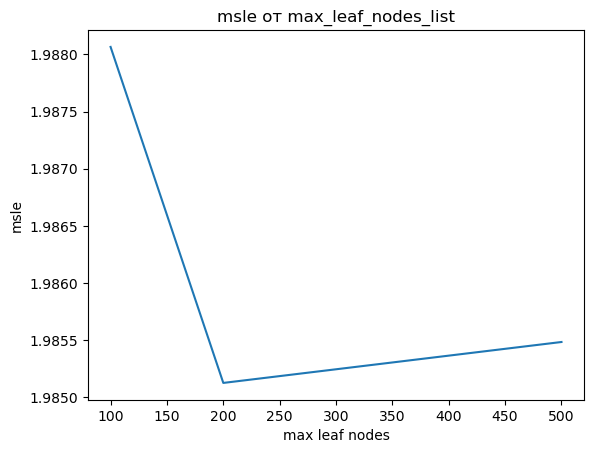

In [132]:
print(max_leaf_nodes_list)
print(mse3)
plt.plot(max_leaf_nodes_list, mse4)
plt.title('msle от max_leaf_nodes_list')
plt.xlabel('max leaf nodes')
plt.ylabel('msle')

In [133]:
plt.plot(min_impurity_decrease_list, mse3)
plt.title('msle от min_impurity_decrease_list')
plt.xlabel('min impurity decrease')
plt.ylabel('msle')

Text(0, 0.5, 'msle')

Подберите лучшую комбинацию параметров, используя `GridSearchCV` и набор массивов значений параметров из предыдущего задания. Для лучшей комбинации посчитайте MSLE на тестовой выборке. Получились ли лучшие параметры такими же, как если бы вы подбирали их по-отдельности при остальных гиперпараметрах по умолчанию (предыдущее задание)? (2б)

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

param_grid = {
    "decision_tree__max_depth": [3, 5, 8, 12],
    "decision_tree__min_samples_split": [10, 50, 100, 500],
    "decision_tree__min_impurity_decrease": [0, 0.1, 0.15, 0.2],
    "decision_tree__max_leaf_nodes": [100, 200, 500]
}
np.random.seed(1)

pipe = Pipeline([("custom_transformer",
                  MeanTargetEncoderNoise(categorical=object_cols, numeric=num_cols)),  
                 ("decision_tree", 
                  DecisionTreeRegressor())])

search = GridSearchCV(pipe, 
                      param_grid, 
                      cv=4,
                      scoring='neg_mean_squared_error',
                      verbose=10)

search.fit(X_train, y_train)

Fitting 4 folds for each of 192 candidates, totalling 768 fits
[CV 1/4; 1/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 1/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.050 total time=   0.6s
[CV 2/4; 1/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 1/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.016 total time=   0.6s
[CV 3/4; 1/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 1/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.065 total time=   0.5s
[CV 4/4; 1/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 1/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-0.889 total time=   0.6s
[CV 1/4; 2/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 2/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.048 total time=   0.5s
[CV 2/4; 2/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 2/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.016 total time=   0.5s
[CV 3/4; 2/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 2/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.065 total time=   0.5s
[CV 4/4; 2/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 2/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-0.889 total time=   0.5s
[CV 1/4; 3/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 3/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.050 total time=   0.5s
[CV 2/4; 3/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 3/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.016 total time=   0.5s
[CV 3/4; 3/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 3/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.066 total time=   0.5s
[CV 4/4; 3/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 3/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-0.889 total time=   0.6s
[CV 1/4; 4/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 4/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.779 total time=   0.5s
[CV 2/4; 4/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 4/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.745 total time=   0.5s
[CV 3/4; 4/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 4/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.804 total time=   0.5s
[CV 4/4; 4/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 4/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.659 total time=   0.6s
[CV 1/4; 5/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 5/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.614 total time=   0.5s
[CV 2/4; 5/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 5/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 5/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 5/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 5/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 5/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 6/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 6/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.614 total time=   0.6s
[CV 2/4; 6/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 6/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 6/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 6/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 6/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 6/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 7/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 7/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.5s
[CV 2/4; 7/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 7/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 7/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 7/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 7/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 7/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.6s
[CV 1/4; 8/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 8/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.613 total time=   0.5s
[CV 2/4; 8/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 8/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 8/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 8/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 8/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 8/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 9/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 9/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.5s
[CV 2/4; 9/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 9/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 9/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 9/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 9/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 9/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 10/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 10/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.6s
[CV 2/4; 10/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 10/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.566 total time=   0.6s
[CV 3/4; 10/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 10/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.5s
[CV 4/4; 10/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 10/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 11/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 11/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.613 total time=   0.6s
[CV 2/4; 11/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 11/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 11/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 11/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 11/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 11/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 12/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 12/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.5s
[CV 2/4; 12/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 12/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.6s
[CV 3/4; 12/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 12/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 12/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 12/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.6s
[CV 1/4; 13/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 13/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.5s
[CV 2/4; 13/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 13/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 13/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 13/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 13/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 13/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 14/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 14/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.6s
[CV 2/4; 14/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 14/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 14/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 14/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 14/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 14/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 15/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 15/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.613 total time=   0.5s
[CV 2/4; 15/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 15/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 15/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 15/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 15/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 15/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 16/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 16/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.614 total time=   0.5s
[CV 2/4; 16/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 16/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.566 total time=   0.5s
[CV 3/4; 16/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 16/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.596 total time=   0.5s
[CV 4/4; 16/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 16/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.6s
[CV 1/4; 17/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 17/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.050 total time=   0.5s
[CV 2/4; 17/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 17/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.016 total time=   0.5s
[CV 3/4; 17/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 17/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.066 total time=   0.5s
[CV 4/4; 17/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 17/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-0.890 total time=   0.5s
[CV 1/4; 18/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 18/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.050 total time=   0.5s
[CV 2/4; 18/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 18/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.016 total time=   0.5s
[CV 3/4; 18/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 18/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.066 total time=   0.5s
[CV 4/4; 18/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 18/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-0.889 total time=   0.5s
[CV 1/4; 19/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 19/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.051 total time=   0.6s
[CV 2/4; 19/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 19/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.016 total time=   0.5s
[CV 3/4; 19/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 19/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.066 total time=   0.5s
[CV 4/4; 19/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 19/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-0.888 total time=   0.5s
[CV 1/4; 20/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 20/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.779 total time=   0.5s
[CV 2/4; 20/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 20/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.745 total time=   0.5s
[CV 3/4; 20/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 20/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.804 total time=   0.6s
[CV 4/4; 20/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 20/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.657 total time=   0.5s
[CV 1/4; 21/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 21/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.5s
[CV 2/4; 21/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 21/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.566 total time=   0.5s
[CV 3/4; 21/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 21/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.596 total time=   0.5s
[CV 4/4; 21/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 21/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 22/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 22/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.5s
[CV 2/4; 22/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 22/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 22/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 22/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.5s
[CV 4/4; 22/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 22/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 23/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 23/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.613 total time=   0.5s
[CV 2/4; 23/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 23/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.566 total time=   0.5s
[CV 3/4; 23/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 23/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.596 total time=   0.5s
[CV 4/4; 23/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 23/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 24/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 24/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.614 total time=   0.5s
[CV 2/4; 24/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 24/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 24/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 24/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 24/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 24/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.6s
[CV 1/4; 25/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 25/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.5s
[CV 2/4; 25/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 25/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 25/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 25/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 25/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 25/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.6s
[CV 1/4; 26/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 26/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.5s
[CV 2/4; 26/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 26/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 26/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 26/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 26/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 26/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 27/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 27/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.613 total time=   0.6s
[CV 2/4; 27/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 27/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.6s
[CV 3/4; 27/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 27/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 27/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 27/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 28/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 28/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.613 total time=   0.5s
[CV 2/4; 28/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 28/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 28/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 28/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.596 total time=   0.5s
[CV 4/4; 28/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 28/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 29/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 29/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.5s
[CV 2/4; 29/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 29/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 29/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 29/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 29/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 29/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 30/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 30/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.614 total time=   0.5s
[CV 2/4; 30/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 30/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 30/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 30/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 30/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 30/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 31/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 31/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.5s
[CV 2/4; 31/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 31/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 31/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 31/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.596 total time=   0.6s
[CV 4/4; 31/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 31/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 32/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 32/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.614 total time=   0.5s
[CV 2/4; 32/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 32/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 32/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 32/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 32/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 32/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 33/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 33/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.050 total time=   0.5s
[CV 2/4; 33/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 33/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.016 total time=   0.5s
[CV 3/4; 33/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 33/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.065 total time=   0.5s
[CV 4/4; 33/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 33/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-0.890 total time=   0.5s
[CV 1/4; 34/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 34/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.050 total time=   0.5s
[CV 2/4; 34/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 34/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.016 total time=   0.5s
[CV 3/4; 34/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 34/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.065 total time=   0.5s
[CV 4/4; 34/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 34/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-0.890 total time=   0.5s
[CV 1/4; 35/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 35/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.050 total time=   0.5s
[CV 2/4; 35/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 35/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.016 total time=   0.5s
[CV 3/4; 35/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 35/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.066 total time=   0.5s
[CV 4/4; 35/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 35/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-0.889 total time=   0.6s
[CV 1/4; 36/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 36/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.779 total time=   0.5s
[CV 2/4; 36/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 36/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.745 total time=   0.5s
[CV 3/4; 36/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 36/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.805 total time=   0.5s
[CV 4/4; 36/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 36/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.653 total time=   0.5s
[CV 1/4; 37/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 37/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.615 total time=   0.5s
[CV 2/4; 37/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 37/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 37/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 37/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 37/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 37/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 38/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 38/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.614 total time=   0.6s
[CV 2/4; 38/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 38/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.6s
[CV 3/4; 38/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 38/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.5s
[CV 4/4; 38/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 38/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.6s
[CV 1/4; 39/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 39/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.5s
[CV 2/4; 39/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 39/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.6s
[CV 3/4; 39/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 39/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.596 total time=   0.5s
[CV 4/4; 39/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 39/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 40/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 40/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.614 total time=   0.6s
[CV 2/4; 40/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 40/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 40/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 40/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 40/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 40/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.6s
[CV 1/4; 41/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 41/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.615 total time=   0.6s
[CV 2/4; 41/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 41/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.7s
[CV 3/4; 41/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 41/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.6s
[CV 4/4; 41/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 41/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 42/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 42/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.615 total time=   0.6s
[CV 2/4; 42/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 42/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.6s
[CV 3/4; 42/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 42/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 42/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 42/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.6s
[CV 1/4; 43/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 43/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.5s
[CV 2/4; 43/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 43/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.566 total time=   0.6s
[CV 3/4; 43/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 43/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.596 total time=   0.5s
[CV 4/4; 43/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 43/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.6s
[CV 1/4; 44/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 44/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.613 total time=   0.5s
[CV 2/4; 44/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 44/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.6s
[CV 3/4; 44/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 44/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 44/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 44/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.538 total time=   0.5s
[CV 1/4; 45/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 45/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.6s
[CV 2/4; 45/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 45/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.566 total time=   0.5s
[CV 3/4; 45/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 45/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 45/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 45/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 46/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 46/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.615 total time=   0.6s
[CV 2/4; 46/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 46/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 46/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 46/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 46/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 46/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 47/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 47/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.6s
[CV 2/4; 47/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 47/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 47/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 47/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 47/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 47/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 48/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 48/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.613 total time=   0.5s
[CV 2/4; 48/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 48/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 48/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 48/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 48/192] START decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 48/192] END decision_tree__max_depth=3, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 49/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 49/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.471 total time=   0.5s
[CV 2/4; 49/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 49/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.921 total time=   0.5s
[CV 3/4; 49/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 49/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-2.002 total time=   0.5s
[CV 4/4; 49/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 49/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.590 total time=   0.5s
[CV 1/4; 50/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 50/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.469 total time=   0.5s
[CV 2/4; 50/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 50/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.240 total time=   0.5s
[CV 3/4; 50/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 50/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-2.002 total time=   0.5s
[CV 4/4; 50/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 50/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.156 total time=   0.6s
[CV 1/4; 51/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 51/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.263 total time=   0.5s
[CV 2/4; 51/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 51/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.242 total time=   0.5s
[CV 3/4; 51/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 51/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.323 total time=   0.5s
[CV 4/4; 51/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 51/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.160 total time=   0.5s
[CV 1/4; 52/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 52/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.775 total time=   0.5s
[CV 2/4; 52/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 52/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.744 total time=   0.5s
[CV 3/4; 52/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 52/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.803 total time=   0.5s
[CV 4/4; 52/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 52/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.653 total time=   0.5s
[CV 1/4; 53/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 53/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.5s
[CV 2/4; 53/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 53/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 53/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 53/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 53/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 53/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 54/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 54/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.5s
[CV 2/4; 54/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 54/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 54/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 54/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 54/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 54/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.6s
[CV 1/4; 55/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 55/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.612 total time=   0.5s
[CV 2/4; 55/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 55/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 55/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 55/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 55/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 55/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 56/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 56/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.613 total time=   0.5s
[CV 2/4; 56/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 56/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 56/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 56/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 56/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 56/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 57/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 57/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.615 total time=   0.5s
[CV 2/4; 57/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 57/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.566 total time=   0.5s
[CV 3/4; 57/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 57/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 57/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 57/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 58/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 58/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.614 total time=   0.5s
[CV 2/4; 58/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 58/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 58/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 58/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 58/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 58/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 59/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 59/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.5s
[CV 2/4; 59/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 59/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 59/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 59/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 59/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 59/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 60/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 60/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.5s
[CV 2/4; 60/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 60/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 60/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 60/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.596 total time=   0.5s
[CV 4/4; 60/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 60/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 61/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 61/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.614 total time=   0.5s
[CV 2/4; 61/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 61/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 61/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 61/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 61/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 61/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 62/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 62/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.615 total time=   0.5s
[CV 2/4; 62/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 62/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 62/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 62/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.5s
[CV 4/4; 62/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 62/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 63/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 63/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.5s
[CV 2/4; 63/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 63/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.6s
[CV 3/4; 63/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 63/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 63/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 63/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 64/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 64/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.613 total time=   0.5s
[CV 2/4; 64/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 64/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.566 total time=   0.5s
[CV 3/4; 64/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 64/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 64/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 64/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.6s
[CV 1/4; 65/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 65/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.471 total time=   0.5s
[CV 2/4; 65/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 65/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.920 total time=   0.5s
[CV 3/4; 65/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 65/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-2.001 total time=   0.5s
[CV 4/4; 65/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 65/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.589 total time=   0.5s
[CV 1/4; 66/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 66/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.470 total time=   0.5s
[CV 2/4; 66/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 66/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.240 total time=   0.5s
[CV 3/4; 66/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 66/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-2.002 total time=   0.5s
[CV 4/4; 66/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 66/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.157 total time=   0.5s
[CV 1/4; 67/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 67/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.263 total time=   0.5s
[CV 2/4; 67/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 67/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.241 total time=   0.5s
[CV 3/4; 67/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 67/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.322 total time=   0.5s
[CV 4/4; 67/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 67/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.160 total time=   0.5s
[CV 1/4; 68/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 68/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.781 total time=   0.5s
[CV 2/4; 68/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 68/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.744 total time=   0.5s
[CV 3/4; 68/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 68/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.803 total time=   0.5s
[CV 4/4; 68/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 68/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.653 total time=   0.5s
[CV 1/4; 69/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 69/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.5s
[CV 2/4; 69/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 69/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.566 total time=   0.5s
[CV 3/4; 69/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 69/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.596 total time=   0.5s
[CV 4/4; 69/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 69/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.6s
[CV 1/4; 70/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 70/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.5s
[CV 2/4; 70/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 70/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 70/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 70/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 70/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 70/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.538 total time=   0.5s
[CV 1/4; 71/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 71/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.613 total time=   0.5s
[CV 2/4; 71/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 71/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.6s
[CV 3/4; 71/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 71/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 71/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 71/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 72/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 72/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.613 total time=   0.5s
[CV 2/4; 72/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 72/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 72/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 72/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.596 total time=   0.5s
[CV 4/4; 72/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 72/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 73/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 73/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.5s
[CV 2/4; 73/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 73/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 73/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 73/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 73/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 73/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 74/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 74/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.614 total time=   0.5s
[CV 2/4; 74/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 74/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 74/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 74/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 74/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 74/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 75/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 75/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.613 total time=   0.5s
[CV 2/4; 75/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 75/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 75/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 75/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.596 total time=   0.5s
[CV 4/4; 75/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 75/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 76/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 76/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.5s
[CV 2/4; 76/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 76/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 76/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 76/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.596 total time=   0.5s
[CV 4/4; 76/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 76/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 77/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 77/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.615 total time=   0.5s
[CV 2/4; 77/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 77/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 77/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 77/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 77/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 77/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.6s
[CV 1/4; 78/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 78/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.5s
[CV 2/4; 78/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 78/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 78/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 78/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 78/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 78/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 79/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 79/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.614 total time=   0.5s
[CV 2/4; 79/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 79/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 79/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 79/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 79/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 79/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 80/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 80/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.5s
[CV 2/4; 80/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 80/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 80/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 80/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 80/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 80/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 81/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 81/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.470 total time=   0.5s
[CV 2/4; 81/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 81/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.921 total time=   0.5s
[CV 3/4; 81/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 81/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-2.001 total time=   0.5s
[CV 4/4; 81/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 81/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.590 total time=   0.5s
[CV 1/4; 82/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 82/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.470 total time=   0.5s
[CV 2/4; 82/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 82/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.240 total time=   0.5s
[CV 3/4; 82/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 82/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-2.002 total time=   0.5s
[CV 4/4; 82/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 82/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.159 total time=   0.5s
[CV 1/4; 83/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 83/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.263 total time=   0.5s
[CV 2/4; 83/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 83/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.241 total time=   0.5s
[CV 3/4; 83/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 83/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.321 total time=   0.5s
[CV 4/4; 83/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 83/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.158 total time=   0.5s
[CV 1/4; 84/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 84/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.774 total time=   0.6s
[CV 2/4; 84/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 84/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.744 total time=   0.7s
[CV 3/4; 84/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 84/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.803 total time=   0.5s
[CV 4/4; 84/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 84/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.653 total time=   0.5s
[CV 1/4; 85/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 85/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.615 total time=   0.5s
[CV 2/4; 85/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 85/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 85/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 85/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 85/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 85/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 86/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 86/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.615 total time=   0.5s
[CV 2/4; 86/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 86/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 86/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 86/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.5s
[CV 4/4; 86/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 86/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 87/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 87/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.5s
[CV 2/4; 87/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 87/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 87/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 87/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.596 total time=   0.5s
[CV 4/4; 87/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 87/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 88/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 88/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.614 total time=   0.5s
[CV 2/4; 88/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 88/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 88/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 88/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 88/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 88/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 89/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 89/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.615 total time=   0.5s
[CV 2/4; 89/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 89/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 89/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 89/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 89/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 89/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.6s
[CV 1/4; 90/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 90/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.5s
[CV 2/4; 90/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 90/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 90/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 90/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.5s
[CV 4/4; 90/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 90/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 91/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 91/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.613 total time=   0.5s
[CV 2/4; 91/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 91/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 91/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 91/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 91/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 91/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 92/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 92/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.5s
[CV 2/4; 92/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 92/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 92/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 92/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 92/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 92/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 93/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 93/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.615 total time=   0.5s
[CV 2/4; 93/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 93/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.6s
[CV 3/4; 93/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 93/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 93/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 93/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 94/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 94/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.5s
[CV 2/4; 94/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 94/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 94/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 94/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.5s
[CV 4/4; 94/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 94/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 95/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 95/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.613 total time=   0.5s
[CV 2/4; 95/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 95/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.566 total time=   0.6s
[CV 3/4; 95/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 95/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 95/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 95/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 96/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 96/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.614 total time=   0.5s
[CV 2/4; 96/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 96/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 96/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 96/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 96/192] START decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 96/192] END decision_tree__max_depth=5, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 97/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 97/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.723 total time=   0.5s
[CV 2/4; 97/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 97/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.919 total time=   0.5s
[CV 3/4; 97/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 97/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.998 total time=   0.5s
[CV 4/4; 97/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 97/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.584 total time=   0.5s
[CV 1/4; 98/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 98/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.467 total time=   0.5s
[CV 2/4; 98/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 98/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.239 total time=   0.5s
[CV 3/4; 98/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 98/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.996 total time=   0.5s
[CV 4/4; 98/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 98/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.154 total time=   0.5s
[CV 1/4; 99/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 99/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.261 total time=   0.5s
[CV 2/4; 99/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 99/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.241 total time=   0.5s
[CV 3/4; 99/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 99/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.318 total time=   0.5s
[CV 4/4; 99/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 99/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.157 total time=   0.5s
[CV 1/4; 100/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 100/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.781 total time=   0.5s
[CV 2/4; 100/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 100/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.744 total time=   0.5s
[CV 3/4; 100/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 100/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.802 total time=   0.5s
[CV 4/4; 100/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 100/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.653 total time=   0.6s
[CV 1/4; 101/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 101/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.615 total time=   0.5s
[CV 2/4; 101/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 101/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.566 total time=   0.5s
[CV 3/4; 101/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 101/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.596 total time=   0.5s
[CV 4/4; 101/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 101/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 102/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 102/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.615 total time=   0.5s
[CV 2/4; 102/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 102/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 102/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 102/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 102/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 102/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.540 total time=   0.5s
[CV 1/4; 103/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 103/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.613 total time=   0.6s
[CV 2/4; 103/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 103/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 103/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 103/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 103/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 103/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 104/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 104/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.5s
[CV 2/4; 104/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 104/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 104/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 104/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 104/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 104/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.540 total time=   0.5s
[CV 1/4; 105/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 105/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.5s
[CV 2/4; 105/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 105/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 105/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 105/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 105/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 105/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 106/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 106/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.615 total time=   0.5s
[CV 2/4; 106/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 106/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 106/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 106/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 106/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 106/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 107/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 107/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.5s
[CV 2/4; 107/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 107/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 107/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 107/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 107/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 107/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 108/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 108/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.614 total time=   0.6s
[CV 2/4; 108/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 108/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 108/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 108/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 108/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 108/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 109/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 109/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.614 total time=   0.5s
[CV 2/4; 109/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 109/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 109/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 109/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 109/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 109/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.6s
[CV 1/4; 110/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 110/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.614 total time=   0.6s
[CV 2/4; 110/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 110/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 110/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 110/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.5s
[CV 4/4; 110/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 110/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 111/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 111/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.614 total time=   0.5s
[CV 2/4; 111/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 111/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 111/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 111/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 111/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 111/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 112/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 112/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.613 total time=   0.5s
[CV 2/4; 112/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 112/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.566 total time=   0.5s
[CV 3/4; 112/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 112/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.596 total time=   0.5s
[CV 4/4; 112/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 112/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 113/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 113/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.720 total time=   0.5s
[CV 2/4; 113/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 113/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.917 total time=   0.5s
[CV 3/4; 113/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 113/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.995 total time=   0.5s
[CV 4/4; 113/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 113/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.585 total time=   0.5s
[CV 1/4; 114/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 114/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.466 total time=   0.5s
[CV 2/4; 114/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 114/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.237 total time=   0.5s
[CV 3/4; 114/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 114/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.996 total time=   0.5s
[CV 4/4; 114/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 114/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.154 total time=   0.5s
[CV 1/4; 115/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 115/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.260 total time=   0.5s
[CV 2/4; 115/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 115/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.240 total time=   0.5s
[CV 3/4; 115/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 115/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.318 total time=   0.5s
[CV 4/4; 115/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 115/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.156 total time=   0.5s
[CV 1/4; 116/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 116/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.779 total time=   0.5s
[CV 2/4; 116/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 116/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.744 total time=   0.5s
[CV 3/4; 116/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 116/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.801 total time=   0.5s
[CV 4/4; 116/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 116/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.653 total time=   0.5s
[CV 1/4; 117/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 117/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.615 total time=   0.5s
[CV 2/4; 117/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 117/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 117/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 117/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 117/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 117/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 118/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 118/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.615 total time=   0.5s
[CV 2/4; 118/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 118/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 118/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 118/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 118/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 118/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.536 total time=   0.5s
[CV 1/4; 119/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 119/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.5s
[CV 2/4; 119/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 119/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.566 total time=   0.5s
[CV 3/4; 119/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 119/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.596 total time=   0.5s
[CV 4/4; 119/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 119/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 120/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 120/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.5s
[CV 2/4; 120/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 120/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.566 total time=   0.5s
[CV 3/4; 120/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 120/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.596 total time=   0.5s
[CV 4/4; 120/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 120/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 121/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 121/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.615 total time=   0.5s
[CV 2/4; 121/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 121/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 121/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 121/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 121/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 121/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 122/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 122/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.615 total time=   0.5s
[CV 2/4; 122/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 122/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 122/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 122/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 122/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 122/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 123/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 123/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.613 total time=   0.5s
[CV 2/4; 123/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 123/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 123/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 123/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 123/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 123/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.540 total time=   0.5s
[CV 1/4; 124/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 124/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.613 total time=   0.5s
[CV 2/4; 124/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 124/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 124/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 124/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.596 total time=   0.5s
[CV 4/4; 124/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 124/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.538 total time=   0.5s
[CV 1/4; 125/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 125/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.615 total time=   0.5s
[CV 2/4; 125/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 125/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 125/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 125/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.596 total time=   0.5s
[CV 4/4; 125/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 125/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 126/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 126/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.5s
[CV 2/4; 126/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 126/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 126/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 126/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.5s
[CV 4/4; 126/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 126/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 127/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 127/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.5s
[CV 2/4; 127/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 127/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 127/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 127/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 127/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 127/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 128/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 128/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.5s
[CV 2/4; 128/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 128/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.566 total time=   0.5s
[CV 3/4; 128/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 128/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.596 total time=   0.5s
[CV 4/4; 128/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 128/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 129/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 129/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.719 total time=   0.5s
[CV 2/4; 129/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 129/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.918 total time=   0.5s
[CV 3/4; 129/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 129/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.995 total time=   0.5s
[CV 4/4; 129/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 129/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.588 total time=   0.5s
[CV 1/4; 130/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 130/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.464 total time=   0.5s
[CV 2/4; 130/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 130/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.237 total time=   0.5s
[CV 3/4; 130/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 130/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.997 total time=   0.5s
[CV 4/4; 130/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 130/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.153 total time=   0.5s
[CV 1/4; 131/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 131/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.260 total time=   0.5s
[CV 2/4; 131/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 131/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.241 total time=   0.5s
[CV 3/4; 131/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 131/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.319 total time=   0.6s
[CV 4/4; 131/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 131/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.155 total time=   0.5s
[CV 1/4; 132/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 132/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.775 total time=   0.5s
[CV 2/4; 132/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 132/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.744 total time=   0.5s
[CV 3/4; 132/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 132/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.803 total time=   0.5s
[CV 4/4; 132/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 132/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.653 total time=   0.5s
[CV 1/4; 133/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 133/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.614 total time=   0.5s
[CV 2/4; 133/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 133/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 133/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 133/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.596 total time=   0.5s
[CV 4/4; 133/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 133/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.540 total time=   0.5s
[CV 1/4; 134/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 134/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.614 total time=   0.5s
[CV 2/4; 134/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 134/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 134/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 134/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.5s
[CV 4/4; 134/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 134/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.537 total time=   0.5s
[CV 1/4; 135/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 135/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.614 total time=   0.5s
[CV 2/4; 135/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 135/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.566 total time=   0.5s
[CV 3/4; 135/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 135/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 135/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 135/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.540 total time=   0.5s
[CV 1/4; 136/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 136/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.6s
[CV 2/4; 136/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 136/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.566 total time=   0.5s
[CV 3/4; 136/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 136/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 136/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 136/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.540 total time=   0.5s
[CV 1/4; 137/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 137/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.615 total time=   0.6s
[CV 2/4; 137/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 137/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.566 total time=   0.5s
[CV 3/4; 137/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 137/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.596 total time=   0.5s
[CV 4/4; 137/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 137/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 138/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 138/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.5s
[CV 2/4; 138/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 138/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.566 total time=   0.5s
[CV 3/4; 138/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 138/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.5s
[CV 4/4; 138/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 138/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 139/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 139/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.5s
[CV 2/4; 139/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 139/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 139/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 139/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 139/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 139/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 140/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 140/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.613 total time=   0.5s
[CV 2/4; 140/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 140/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 140/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 140/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 140/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 140/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 141/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 141/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.5s
[CV 2/4; 141/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 141/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.566 total time=   0.5s
[CV 3/4; 141/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 141/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 141/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 141/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 142/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 142/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.5s
[CV 2/4; 142/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 142/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 142/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 142/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.5s
[CV 4/4; 142/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 142/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 143/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 143/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.614 total time=   0.5s
[CV 2/4; 143/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 143/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 143/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 143/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 143/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 143/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.540 total time=   0.5s
[CV 1/4; 144/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 144/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.5s
[CV 2/4; 144/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 144/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 144/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 144/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 144/192] START decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 144/192] END decision_tree__max_depth=8, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.540 total time=   0.5s
[CV 1/4; 145/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 145/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.723 total time=   0.5s
[CV 2/4; 145/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 145/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.921 total time=   0.5s
[CV 3/4; 145/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 145/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.996 total time=   0.5s
[CV 4/4; 145/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 145/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.587 total time=   0.5s
[CV 1/4; 146/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 146/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.464 total time=   0.5s
[CV 2/4; 146/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 146/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.237 total time=   0.5s
[CV 3/4; 146/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 146/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.996 total time=   0.5s
[CV 4/4; 146/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 146/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.153 total time=   0.5s
[CV 1/4; 147/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 147/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.260 total time=   0.5s
[CV 2/4; 147/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 147/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.241 total time=   0.5s
[CV 3/4; 147/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 147/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.318 total time=   0.6s
[CV 4/4; 147/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 147/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.156 total time=   0.6s
[CV 1/4; 148/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 148/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.779 total time=   0.7s
[CV 2/4; 148/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 148/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.744 total time=   0.6s
[CV 3/4; 148/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 148/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.801 total time=   0.5s
[CV 4/4; 148/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 148/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.653 total time=   0.5s
[CV 1/4; 149/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 149/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.615 total time=   0.5s
[CV 2/4; 149/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 149/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.566 total time=   0.5s
[CV 3/4; 149/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 149/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.596 total time=   0.5s
[CV 4/4; 149/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 149/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 150/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 150/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.615 total time=   0.5s
[CV 2/4; 150/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 150/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 150/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 150/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.5s
[CV 4/4; 150/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 150/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 151/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 151/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.613 total time=   0.5s
[CV 2/4; 151/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 151/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 151/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 151/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 151/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 151/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 152/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 152/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.5s
[CV 2/4; 152/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 152/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 152/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 152/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 152/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 152/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.538 total time=   0.6s
[CV 1/4; 153/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 153/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.5s
[CV 2/4; 153/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 153/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 153/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 153/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.596 total time=   0.6s
[CV 4/4; 153/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 153/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 154/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 154/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.5s
[CV 2/4; 154/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 154/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.566 total time=   0.5s
[CV 3/4; 154/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 154/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.5s
[CV 4/4; 154/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 154/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 155/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 155/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.614 total time=   0.5s
[CV 2/4; 155/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 155/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 155/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 155/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 155/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 155/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 156/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 156/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.5s
[CV 2/4; 156/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 156/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 156/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 156/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 156/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 156/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.6s
[CV 1/4; 157/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 157/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.614 total time=   0.5s
[CV 2/4; 157/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 157/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 157/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 157/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.596 total time=   0.5s
[CV 4/4; 157/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 157/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.536 total time=   0.5s
[CV 1/4; 158/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 158/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.5s
[CV 2/4; 158/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 158/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 158/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 158/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 158/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 158/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 159/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 159/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.613 total time=   0.5s
[CV 2/4; 159/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 159/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.7s
[CV 3/4; 159/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 159/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 159/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 159/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 160/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 160/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.614 total time=   0.5s
[CV 2/4; 160/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 160/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 160/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 160/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 160/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 160/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=100, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 161/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 161/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.718 total time=   0.5s
[CV 2/4; 161/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 161/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.918 total time=   0.5s
[CV 3/4; 161/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 161/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-2.001 total time=   0.5s
[CV 4/4; 161/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 161/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.587 total time=   0.5s
[CV 1/4; 162/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 162/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.463 total time=   0.5s
[CV 2/4; 162/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 162/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.238 total time=   0.6s
[CV 3/4; 162/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 162/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.995 total time=   0.5s
[CV 4/4; 162/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 162/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.153 total time=   0.5s
[CV 1/4; 163/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 163/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.261 total time=   0.5s
[CV 2/4; 163/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 163/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.241 total time=   0.5s
[CV 3/4; 163/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 163/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.319 total time=   0.5s
[CV 4/4; 163/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 163/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.157 total time=   0.5s
[CV 1/4; 164/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 164/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.775 total time=   0.5s
[CV 2/4; 164/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 164/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.744 total time=   0.5s
[CV 3/4; 164/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 164/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.803 total time=   0.5s
[CV 4/4; 164/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 164/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.646 total time=   0.5s
[CV 1/4; 165/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 165/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.6s
[CV 2/4; 165/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 165/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.6s
[CV 3/4; 165/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 165/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 165/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 165/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 166/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 166/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.615 total time=   0.5s
[CV 2/4; 166/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 166/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.566 total time=   0.5s
[CV 3/4; 166/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 166/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 166/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 166/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.6s
[CV 1/4; 167/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 167/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.614 total time=   0.5s
[CV 2/4; 167/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 167/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.566 total time=   0.5s
[CV 3/4; 167/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 167/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 167/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 167/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 168/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 168/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.5s
[CV 2/4; 168/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 168/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 168/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 168/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 168/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 168/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 169/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 169/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.5s
[CV 2/4; 169/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 169/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 169/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 169/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 169/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 169/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 170/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 170/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.615 total time=   0.5s
[CV 2/4; 170/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 170/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 170/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 170/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.596 total time=   0.6s
[CV 4/4; 170/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 170/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 171/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 171/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.614 total time=   0.7s
[CV 2/4; 171/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 171/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.6s
[CV 3/4; 171/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 171/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.596 total time=   0.5s
[CV 4/4; 171/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 171/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 172/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 172/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.613 total time=   0.5s
[CV 2/4; 172/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 172/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 172/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 172/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 172/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 172/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 173/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 173/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.5s
[CV 2/4; 173/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 173/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 173/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 173/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 173/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 173/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 174/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 174/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.614 total time=   0.5s
[CV 2/4; 174/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 174/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 174/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 174/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 174/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 174/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 175/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 175/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.5s
[CV 2/4; 175/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 175/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.5s
[CV 3/4; 175/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 175/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.5s
[CV 4/4; 175/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 175/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.6s
[CV 1/4; 176/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 176/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.6s
[CV 2/4; 176/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 176/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.6s
[CV 3/4; 176/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 176/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.6s
[CV 4/4; 176/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 176/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=200, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.6s
[CV 1/4; 177/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 177/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.719 total time=   0.6s
[CV 2/4; 177/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 177/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.917 total time=   0.6s
[CV 3/4; 177/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 177/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-2.000 total time=   0.6s
[CV 4/4; 177/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 177/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=10;, score=-1.588 total time=   0.6s
[CV 1/4; 178/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 178/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.464 total time=   0.6s
[CV 2/4; 178/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 178/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.238 total time=   0.6s
[CV 3/4; 178/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 178/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.996 total time=   0.6s
[CV 4/4; 178/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 178/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=50;, score=-1.152 total time=   0.6s
[CV 1/4; 179/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 179/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.260 total time=   0.5s
[CV 2/4; 179/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 179/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.240 total time=   0.5s
[CV 3/4; 179/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 179/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.319 total time=   0.5s
[CV 4/4; 179/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 179/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=100;, score=-1.155 total time=   0.5s
[CV 1/4; 180/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 180/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.781 total time=   0.5s
[CV 2/4; 180/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 180/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.744 total time=   0.5s
[CV 3/4; 180/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 180/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.803 total time=   0.5s
[CV 4/4; 180/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 180/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0, decision_tree__min_samples_split=500;, score=-0.648 total time=   0.5s
[CV 1/4; 181/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 181/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.614 total time=   0.5s
[CV 2/4; 181/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 181/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.5s
[CV 3/4; 181/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 181/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.596 total time=   0.5s
[CV 4/4; 181/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 181/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=10;, score=-0.540 total time=   0.6s
[CV 1/4; 182/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 182/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.614 total time=   0.6s
[CV 2/4; 182/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 182/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.6s
[CV 3/4; 182/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 182/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.5s
[CV 4/4; 182/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 182/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.6s
[CV 1/4; 183/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 183/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.6s
[CV 2/4; 183/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 183/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.566 total time=   0.5s
[CV 3/4; 183/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 183/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.597 total time=   0.6s
[CV 4/4; 183/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 183/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.6s
[CV 1/4; 184/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 184/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.614 total time=   0.6s
[CV 2/4; 184/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 184/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 184/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 184/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 184/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 184/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.1, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s
[CV 1/4; 185/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 185/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.613 total time=   0.5s
[CV 2/4; 185/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 185/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.566 total time=   0.5s
[CV 3/4; 185/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 185/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.5s
[CV 4/4; 185/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 185/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.5s
[CV 1/4; 186/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 186/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.613 total time=   0.5s
[CV 2/4; 186/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 186/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 186/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 186/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.6s
[CV 4/4; 186/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 186/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.6s
[CV 1/4; 187/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 187/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.615 total time=   0.6s
[CV 2/4; 187/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 187/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.566 total time=   0.5s
[CV 3/4; 187/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 187/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.596 total time=   0.5s
[CV 4/4; 187/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 187/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=100;, score=-0.540 total time=   0.5s
[CV 1/4; 188/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 188/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.5s
[CV 2/4; 188/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 188/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.5s
[CV 3/4; 188/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 188/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.596 total time=   0.6s
[CV 4/4; 188/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 188/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.15, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.6s
[CV 1/4; 189/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 189/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.614 total time=   0.6s
[CV 2/4; 189/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 189/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.567 total time=   0.6s
[CV 3/4; 189/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 189/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.597 total time=   0.6s
[CV 4/4; 189/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 189/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.539 total time=   0.6s
[CV 1/4; 190/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 190/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.614 total time=   0.5s
[CV 2/4; 190/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 190/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.567 total time=   0.5s
[CV 3/4; 190/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 190/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.597 total time=   0.6s
[CV 4/4; 190/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 190/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=50;, score=-0.539 total time=   0.5s
[CV 1/4; 191/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 191/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.613 total time=   0.5s
[CV 2/4; 191/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 191/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.567 total time=   0.6s
[CV 3/4; 191/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 191/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.596 total time=   0.5s
[CV 4/4; 191/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 191/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=100;, score=-0.539 total time=   0.5s
[CV 1/4; 192/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 1/4; 192/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.615 total time=   0.5s
[CV 2/4; 192/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 2/4; 192/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.567 total time=   0.6s
[CV 3/4; 192/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 3/4; 192/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.597 total time=   0.5s
[CV 4/4; 192/192] START decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

[CV 4/4; 192/192] END decision_tree__max_depth=12, decision_tree__max_leaf_nodes=500, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=500;, score=-0.539 total time=   0.5s


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('custom_transformer',
                                        MeanTargetEncoderNoise(categorical=['name',
                                                                            'year',
                                                                            'fuel',
                                                                            'seller_type',
                                                                            'transmission',
                                                                            'owner'],
                                                               numeric=['km_driven'])),
                                       ('decision_tree',
                                        DecisionTreeRegressor())]),
             param_grid={'decision_tree__max_depth': [3, 5, 8, 12],
                         'decision_tree__max_leaf_nodes': [100, 200, 500],
                         'decision_tree__min_impurity_decrease': [0, 0.1, 0.15,
                                                                  0.2],
                         'decision_tree__min_samples_split': [10, 50, 100,
                                                              500]},
             scoring='neg_mean_squared_error', verbose=10)

In [147]:
print(f'best score is {-search.best_score_:.2f}')
print(f'best params are {search.best_params_}')

best score is 0.58
best params are {'decision_tree__max_depth': 12, 'decision_tree__max_leaf_nodes': 100, 'decision_tree__min_impurity_decrease': 0.2, 'decision_tree__min_samples_split': 10}


In [148]:
mse(search.best_estimator_.predict(X_test), y_test)

C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:47: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = column.replace(list(setik), 0).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old

0.5197845418970586

In [152]:
pipe = Pipeline([('custom_transformer', MeanTargetEncoderNoise(categorical = object_cols, numeric = num_cols)),
                    ('decision_tree', DecisionTreeRegressor())])
pipe.set_params(**search.best_params_)
pipe.fit(X_train, y_train)
score = mse(pipe.predict(X_test), y_test)
print(round(score,2))

C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

0.52


C:\Users\jackt\AppData\Local\Temp\ipykernel_12292\2005404688.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  column = df[i].replace(arr[c][0], arr[c][1]).reset_index()[i]
